In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')


In [2]:
df = pd.read_csv('happiness_data.csv')
df.head(10)

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268
5,Afghanistan,2013,3.572,7.725,0.484,52.56,0.578,0.061,0.823,0.621,0.273
6,Afghanistan,2014,3.131,7.718,0.526,52.88,0.509,0.104,0.871,0.532,0.375
7,Afghanistan,2015,3.983,7.702,0.529,53.20,0.389,0.080,0.881,0.554,0.339
8,Afghanistan,2016,4.220,7.697,0.559,53.00,0.523,0.042,0.793,0.565,0.348
9,Afghanistan,2017,2.662,7.697,0.491,52.80,0.427,-0.121,0.954,0.496,0.371


## CALCULATING THE STATISTICS OF THE DATA

In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,1949.0,2013.216008,4.166828,2005.000,2010.00000,2013.0000,2017.000,2020.000
Life Ladder,1949.0,5.466705,1.115711,2.375,4.64000,5.3860,6.283,8.019
Log GDP per capita,1913.0,9.368453,1.154084,6.635,8.46400,9.4600,10.353,11.648
Social support,1936.0,0.812552,0.118482,0.290,0.74975,0.8355,0.905,0.987
Healthy life expectancy at birth,1894.0,63.359374,7.510245,32.300,58.68500,65.2000,68.590,77.100
Freedom to make life choices,1917.0,0.742558,0.142093,0.258,0.64700,0.7630,0.856,0.985
Generosity,1860.0,0.000103,0.162215,-0.335,-0.11300,-0.0255,0.091,0.698
Perceptions of corruption,1839.0,0.747125,0.186789,0.035,0.69000,0.8020,0.872,0.983
Positive affect,1927.0,0.710003,0.107100,0.322,0.62550,0.7220,0.799,0.944
Negative affect,1933.0,0.268544,0.085168,0.083,0.20600,0.2580,0.320,0.705


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      1949 non-null   object 
 1   year                              1949 non-null   int64  
 2   Life Ladder                       1949 non-null   float64
 3   Log GDP per capita                1913 non-null   float64
 4   Social support                    1936 non-null   float64
 5   Healthy life expectancy at birth  1894 non-null   float64
 6   Freedom to make life choices      1917 non-null   float64
 7   Generosity                        1860 non-null   float64
 8   Perceptions of corruption         1839 non-null   float64
 9   Positive affect                   1927 non-null   float64
 10  Negative affect                   1933 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 167.6+ KB


### OBSERVATIONS

1. Brief summary of the data -
This particular dataset consist of information related to health, social and other factors for different countries for the years 2008-2012. There are around 1949 entries and 10 attributes overall. 
2. The log GDP per capita has values higher than 6, but rest of the required columns have data value between 0-1. Hence we would do Min-Max scaling with the log GDP data so as to have a uniform range for the columns
3. The continous attributes are -
    * Life Ladder
    * Log GDP per capita
    * Social support
    * Freedom to make life choices
    * Generosity
    * Perceptions of corruption
    * Positive affect
    * Negative affect
4. The categorical attributes are -
    * Country name
    * Year

In [5]:
#Checking number of null values in each column
df.isna().sum()

Country name                          0
year                                  0
Life Ladder                           0
Log GDP per capita                   36
Social support                       13
Healthy life expectancy at birth     55
Freedom to make life choices         32
Generosity                           89
Perceptions of corruption           110
Positive affect                      22
Negative affect                      16
dtype: int64

### DROPPING MISSING VALUES
1. First we delete the rows that don't have the y-column Healthy life expectancy at birth data. Filling the y-column data by the column statistics will lead to inaccurate ground truth labels
2. Then to fill values for each continuous column, **we group the countries by the country name, and then we fill the data by the median value**. We don't want to use data from US to fill data for some other country, hence we first did a groupby based on the country name and then filled with the median value
3. Finally, we just drop the remaining rows with missing values, as there are some countries which appear once in the dataset and have missing values.

In [6]:
#Dropping based on the subset of y-columns
df.dropna(subset=['Healthy life expectancy at birth'],inplace=True)

In [7]:
train_cols = df.columns.tolist()
train_cols.remove('year')
train_cols.remove('Life Ladder')
train_cols.remove('Healthy life expectancy at birth')
print(train_cols)

['Country name', 'Log GDP per capita', 'Social support', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Positive affect', 'Negative affect']


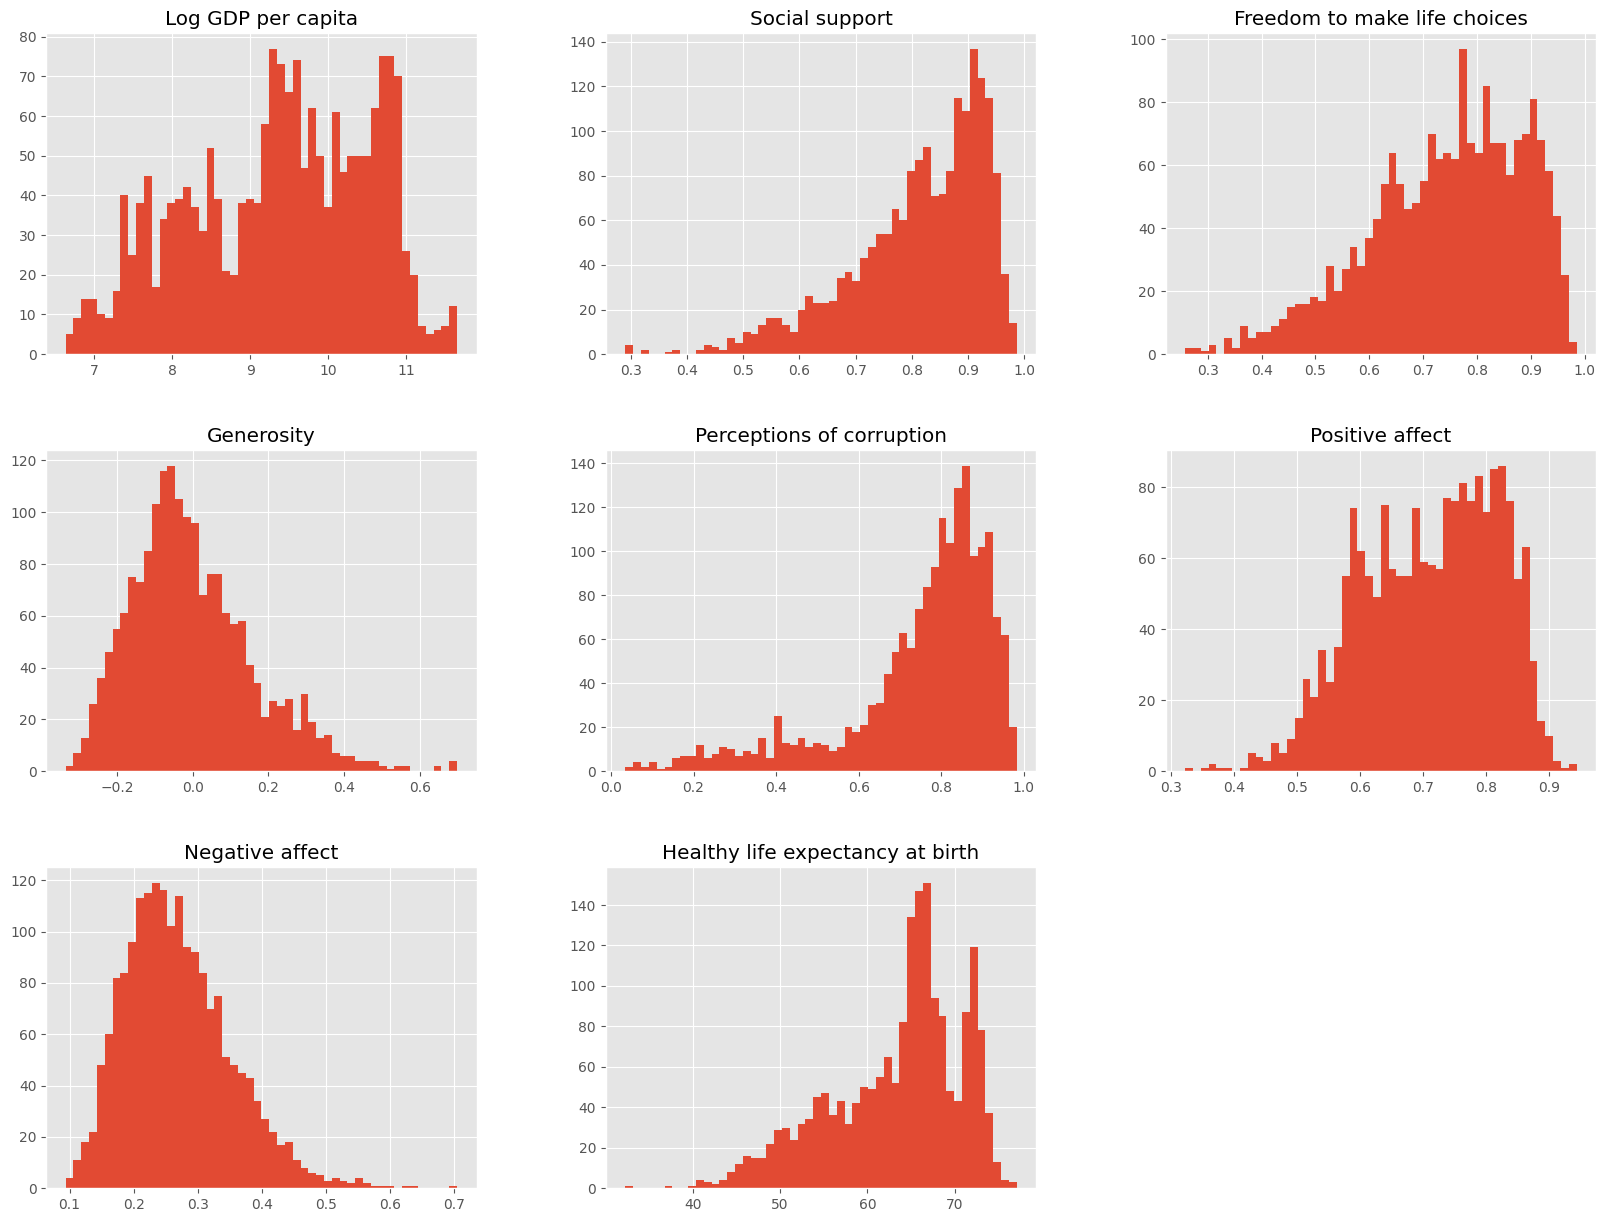

In [8]:
df[train_cols+['Healthy life expectancy at birth']].hist(bins=50,figsize=(20,15))
plt.show()

In [9]:
# Modify the Log GDP per capita column
from sklearn.base import BaseEstimator, TransformerMixin
from typing import List
class GroupByImputer(BaseEstimator,TransformerMixin):
    def __init__(self,groupby_col:str,continuous_col:List[str]):
        self.groupby_col = groupby_col
        self.continuous_col = continuous_col

    def fit(self,X,y=None):
        return self
    
    def transform(self,X):
        X_transformed = X.copy()
        for col in self.continuous_col:
            #Fill the data by the median value
            X_transformed[col] = X_transformed[col].fillna(X_transformed.groupby(self.groupby_col)[col].transform("median"))
        return X_transformed

In [10]:
#Grouping by the country name to fill in the data
imp = GroupByImputer(groupby_col='Country name',continuous_col=train_cols[1:])

imp.fit(df)

transformed_df = imp.transform(df)


In [11]:
transformed_df.isna().sum()

Country name                         0
year                                 0
Life Ladder                          0
Log GDP per capita                   8
Social support                       1
Healthy life expectancy at birth     0
Freedom to make life choices         0
Generosity                           8
Perceptions of corruption           28
Positive affect                      2
Negative affect                      1
dtype: int64

In [12]:
#Just dropping the remaining null valued rows
transformed_df.dropna(inplace=True)

In [13]:
transformed_df[train_cols+['Healthy life expectancy at birth']].corr(method="pearson").style.background_gradient(cmap='coolwarm').format(precision=4)

#Freedom to make life choices is correlated with postive effect
#Log GRP per capita has a stronger relation with social support

,Log GDP per capita,Social support,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Healthy life expectancy at birth
Log GDP per capita,1.0000,0.6958,0.3620,-0.0056,-0.3717,0.3029,-0.1986,0.8505
Social support,0.6958,1.0000,0.4178,0.0645,-0.2370,0.4503,-0.4026,0.6171
Freedom to make life choices,0.3620,0.4178,1.0000,0.3355,-0.4945,0.6121,-0.2597,0.3892
Generosity,-0.0056,0.0645,0.3355,1.0000,-0.2892,0.3736,-0.0834,0.0303
Perceptions of corruption,-0.3717,-0.2370,-0.4945,-0.2892,1.0000,-0.3072,0.2548,-0.3367
Positive affect,0.3029,0.4503,0.6121,0.3736,-0.3072,1.0000,-0.3615,0.3181
Negative affect,-0.1986,-0.4026,-0.2597,-0.0834,0.2548,-0.3615,1.0000,-0.1302
Healthy life expectancy at birth,0.8505,0.6171,0.3892,0.0303,-0.3367,0.3181,-0.1302,1.0000


### OBSERVATIONS FROM THE CORRELATION PLOT
1. Freedom to make life choices is correlated with postive effect
2. Log GDP per capita has a stronger relation with social support
3. Log GDP per capita has a stronger relation with Healthy life expectancy at birth. So we will use this to divide our dataset so that the train and test follow similar distribution

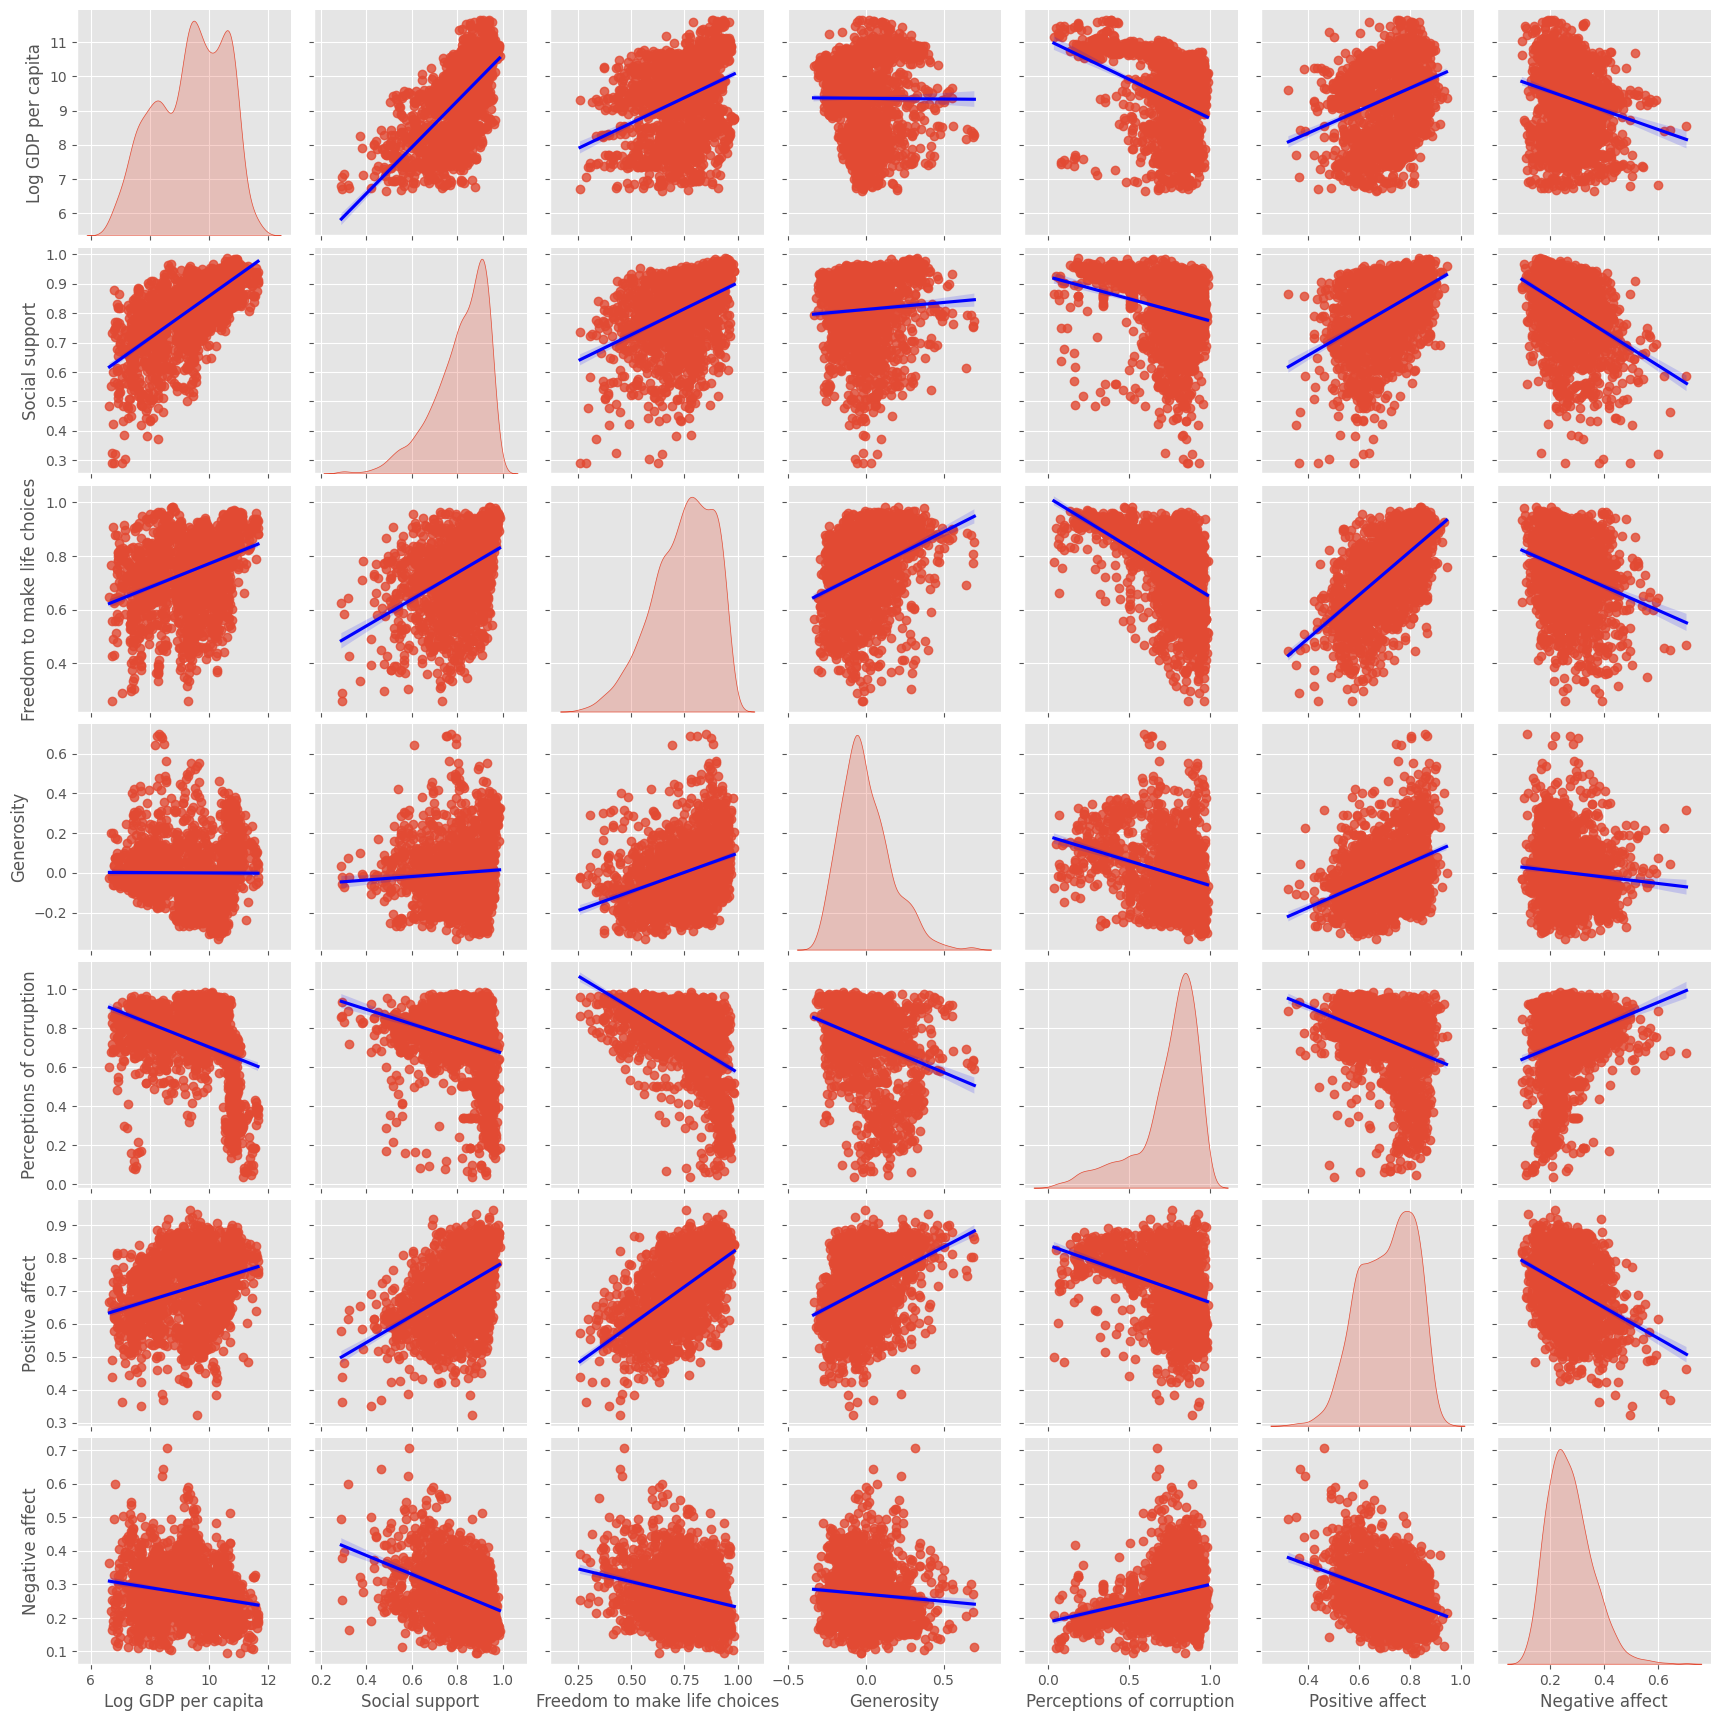

In [14]:
import seaborn as sns

sns.pairplot(transformed_df[train_cols],kind='reg', diag_kind='kde',
             plot_kws={'line_kws':{'color':'blue'}})
plt.show()

### STRATIFIED SPLITTING
1. From the above correlation plots, we found that the Log GDP per capita has the highest correlation with the y-column Healthy life expectancy at birth. As the Log GDP is a continuous column, we first cateogrize the column using `pd.cut`.
2. The we do stratified splitting afterwards

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

# Categorizing the column Log GDP per capita
transformed_df['log_gdp_cat'] = pd.cut(transformed_df['Log GDP per capita'],
                                        bins=[6,8,10,12],
                                        labels=[0,1,2])

#Min max scaling of the column Log GDP per capita
transformed_df['Log GDP per capita'] = (transformed_df['Log GDP per capita'] -transformed_df['Log GDP per capita'].min())/(transformed_df['Log GDP per capita'].max()-transformed_df['Log GDP per capita'].min())


In [16]:
#Checking if the categorization of the column is uniform and balanced
transformed_df['log_gdp_cat'].value_counts()

1    919
2    639
0    301
Name: log_gdp_cat, dtype: int64

In [17]:
# One-hot encoding for the categorical column Country name
transformed_df = pd.get_dummies(transformed_df, columns = ['Country name'])

In [18]:
#Dropping the columns year and Life Ladder
transformed_df.drop(['year','Life Ladder'],axis=1,inplace=True)

In [19]:
transformed_df.head()

,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,log_gdp_cat,Country name_Afghanistan,...,Country name_United Arab Emirates,Country name_United Kingdom,Country name_United States,Country name_Uruguay,Country name_Uzbekistan,Country name_Venezuela,Country name_Vietnam,Country name_Yemen,Country name_Zambia,Country name_Zimbabwe
0,0.146619,0.451,50.80,0.718,0.168,0.882,0.518,0.258,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0.180531,0.552,51.20,0.679,0.190,0.850,0.584,0.237,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0.201875,0.539,51.60,0.600,0.121,0.707,0.618,0.275,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0.196489,0.521,51.92,0.496,0.162,0.731,0.611,0.267,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0.213445,0.521,52.24,0.531,0.236,0.776,0.710,0.268,0,1,...,0,0,0,0,0,0,0,0,0,0


## TRAIN TEST SPLIT

In [20]:
from sklearn.model_selection import train_test_split

# X = transformed_df[train_cols+['log_gdp_cat']]
y = transformed_df['Healthy life expectancy at birth']
train_cols = transformed_df.columns.tolist()
train_cols.remove('Healthy life expectancy at birth')
X = transformed_df[train_cols]

# SPLITTING THE DATA BASED ON THE STRATIFIED FOLD SPLIT BASED ON THE LOG GDP PER CAPITA COLUMN
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,stratify=X['log_gdp_cat'],random_state=42,shuffle=True)


In [36]:
# Dropping the created categorical column
X_train.drop(['log_gdp_cat'],axis=1,inplace=True)
X_test.drop(['log_gdp_cat'],axis=1,inplace=True)

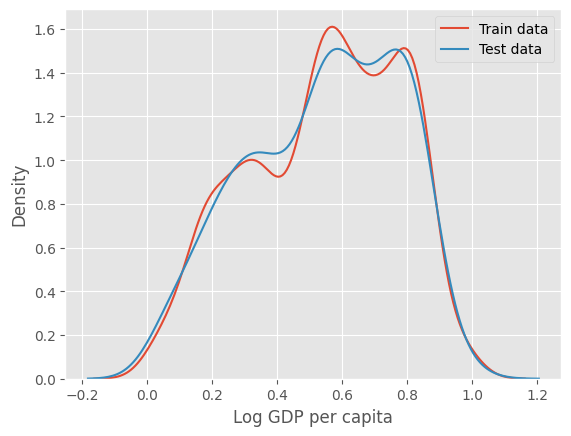

In [22]:
ax = sns.kdeplot(X_train['Log GDP per capita'],label='Train data')
sns.kdeplot(X_test['Log GDP per capita'], ax=ax,label='Test data')
plt.legend()

In [23]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Log GDP per capita,1487.0,0.544239,0.232101,0.000,0.358269,0.56553,0.739278,1.000
Social support,1487.0,0.813005,0.118359,0.291,0.746000,0.83900,0.905000,0.985
Freedom to make life choices,1487.0,0.743802,0.142226,0.258,0.646000,0.76300,0.860000,0.985
Generosity,1487.0,0.000005,0.162625,-0.335,-0.113000,-0.02500,0.091000,0.698
Perceptions of corruption,1487.0,0.742037,0.190810,0.035,0.680500,0.79900,0.875000,0.983
...,...,...,...,...,...,...,...,...
Country name_Venezuela,1487.0,0.008070,0.089500,0.000,0.000000,0.00000,0.000000,1.000
Country name_Vietnam,1487.0,0.007397,0.085719,0.000,0.000000,0.00000,0.000000,1.000
Country name_Yemen,1487.0,0.006052,0.077588,0.000,0.000000,0.00000,0.000000,1.000
Country name_Zambia,1487.0,0.008070,0.089500,0.000,0.000000,0.00000,0.000000,1.000


In [24]:
X_test.describe().T

,count,mean,std,min,25%,50%,75%,max
Log GDP per capita,372.0,0.541116,0.229972,0.029922,0.364752,0.562138,0.749052,0.993816
Social support,372.0,0.811142,0.124042,0.290000,0.749750,0.829000,0.911000,0.987000
Freedom to make life choices,372.0,0.742167,0.140278,0.306000,0.647000,0.767500,0.850000,0.971000
Generosity,372.0,-0.000700,0.159468,-0.295000,-0.112000,-0.030000,0.085000,0.650000
Perceptions of corruption,372.0,0.740792,0.180978,0.060000,0.684500,0.794000,0.859250,0.968000
...,...,...,...,...,...,...,...,...
Country name_Venezuela,372.0,0.008065,0.089560,0.000000,0.000000,0.000000,0.000000,1.000000
Country name_Vietnam,372.0,0.008065,0.089560,0.000000,0.000000,0.000000,0.000000,1.000000
Country name_Yemen,372.0,0.008065,0.089560,0.000000,0.000000,0.000000,0.000000,1.000000
Country name_Zambia,372.0,0.005376,0.073225,0.000000,0.000000,0.000000,0.000000,1.000000


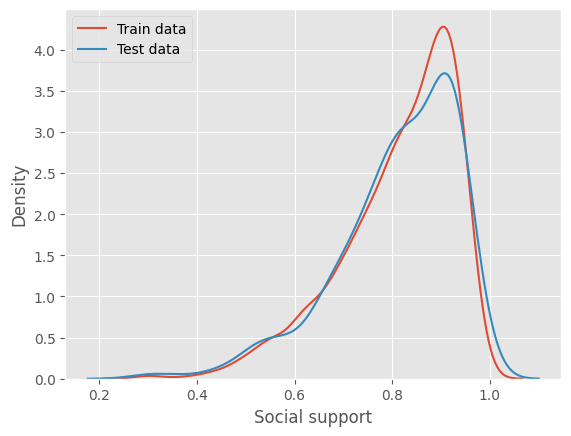

In [25]:
ax = sns.kdeplot(X_train['Social support'],label='Train data')
sns.kdeplot(X_test['Social support'], ax=ax,label='Test data')
plt.legend()

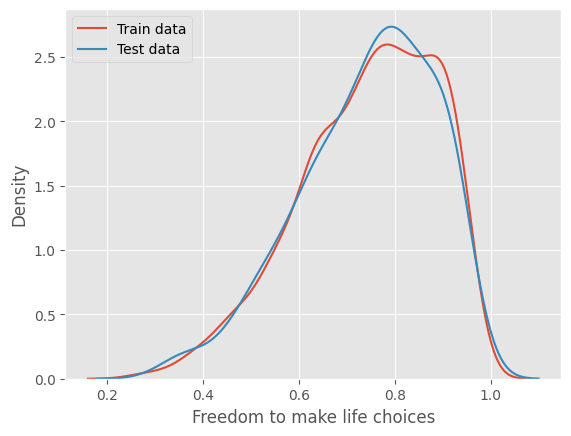

In [29]:
ax = sns.kdeplot(X_train['Freedom to make life choices'],label='Train data')
sns.kdeplot(X_test['Freedom to make life choices'], ax=ax,label='Test data')
plt.legend()

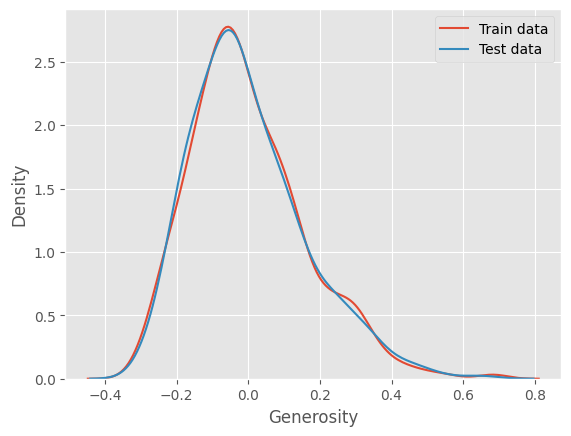

In [30]:
ax = sns.kdeplot(X_train[ 'Generosity'],label='Train data')
sns.kdeplot(X_test[ 'Generosity'], ax=ax,label='Test data')
plt.legend()

* We can see that the train set and the test set have equivalent distribution based on the Log GDP per capita column. It signifies that the test set is representative of our train set, and the split ensures that the model encounters similar distribution of data for both train and test set
* Also, the mean of the columns in both train and test set are nearly similar

## TRAINING AND TESTING

## LINEAR REGRESSION

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error
lin_reg = LinearRegression()

In [32]:
import pprint
cv_lin_reg = cross_validate(lin_reg,X_train,y_train,cv=4,scoring='neg_mean_squared_error',return_train_score=True)
pprint.pprint(cv_lin_reg)

{'fit_time': array([0.07822013, 0.00900221, 0.00999904, 0.00899887]),
 'score_time': array([0.00300097, 0.00199795, 0.00200009, 0.00200033]),
 'test_score': array([-1.88098223e+00, -2.38690270e+23, -2.97223808e+24, -4.65675782e+24]),
 'train_score': array([-1.43799357, -1.2892065 , -1.46250451, -1.45355646])}


In [33]:
lin_reg = [-np.median(cv_lin_reg['train_score']),-np.median(cv_lin_reg['test_score'])]

print(f"The train loss {lin_reg[0]}")
print(f"The validation loss {lin_reg[1]}")

The train loss 1.4457750158500953
The validation loss 1.6054641757515818e+24


In [37]:
test_pred = lin_reg.fit(X_train,y_train).predict(X_test)

print("The test set error is ", mean_squared_error(y_test,test_pred))

The test set error is  3.9118284033792665e+22


## REGULARIZATION LINEAR REGRESSION

In [39]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.linear_model import LassoCV,RidgeCV,ElasticNetCV
from sklearn.model_selection import cross_validate

In [40]:
#List of alpha values that we will cross validate
alpha_list = [0.001,0.01,0.1,1,10]

def regularization_run(X,y,alpha_list:list,scoring=['neg_mean_squared_error']):
    lasso_alpha_dict = {}
    ridge_alpha_dict = {}
    # elastic_alpha_dict = {}

    lasso_model,ridge_model,elastic_model = {},{},{}
    for alpha in alpha_list:
        lasso_reg = Lasso(alpha=alpha,random_state=42)

        ridge_reg = Ridge(alpha=alpha,random_state=42,solver='svd')
        
        # elastic_reg = ElasticNet(alpha=alpha,random_state=42)

        lasso_res = cross_validate(lasso_reg,X,y,cv=4,scoring=scoring,return_train_score=True)
        ridge_res = cross_validate(ridge_reg,X,y,cv=4,scoring=scoring,return_train_score=True)
        # elastic_res = cross_validate(elastic_reg,X,y,cv=4,scoring=scoring,return_train_score=True)
        
        lasso_alpha_dict.update({str(alpha):[-lasso_res['train_neg_mean_squared_error'].mean(),-lasso_res['test_neg_mean_squared_error'].mean()]})
        ridge_alpha_dict.update({str(alpha):[-ridge_res['train_neg_mean_squared_error'].mean(),-ridge_res['test_neg_mean_squared_error'].mean()]})
        # elastic_alpha_dict.update({str(alpha):[-elastic_res['train_neg_mean_squared_error'].mean(),-elastic_res['test_neg_mean_squared_error'].mean()]})

        lasso_model.update({str(alpha):lasso_reg.fit(X,y)})
        ridge_model.update({str(alpha):ridge_reg.fit(X,y)})
        # elastic_model.update({str(alpha):elastic_reg.fit(X,y)})
        
    return lasso_alpha_dict,ridge_alpha_dict,lasso_model,ridge_model

lasso_alpha_dict,ridge_alpha_dict,lasso_model,ridge_model = regularization_run(X_train,y_train,alpha_list)

## LASSO REGRESSION

In [47]:
pprint.pprint(lasso_alpha_dict)

{'0.001': [1.4592007315063795, 2.1587541690370604],
 '0.01': [3.356685071156751, 4.309007866099776],
 '0.1': [15.329282917222413, 15.471469358494527],
 '1': [33.82098308830399, 33.92086390840395],
 '10': [55.54123252134499, 55.68761401110284]}


<AxesSubplot:title={'center':'Lasso Regression'}, xlabel='Alpha', ylabel='MSE'>

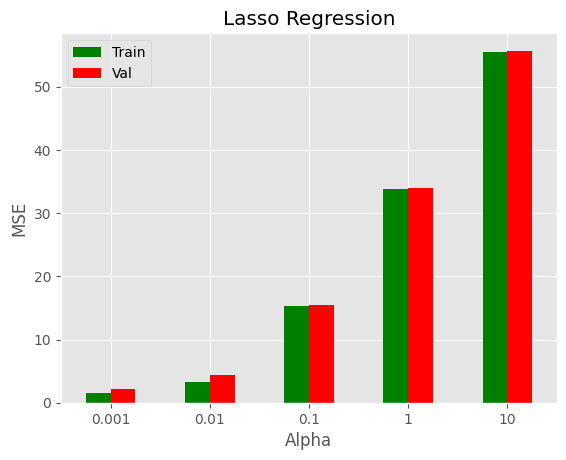

In [41]:
train_color,val_color = 'green','red'
lasso_df = pd.DataFrame(lasso_alpha_dict).T
lasso_df.columns = ['Train','Val']
lasso_df.plot.bar(rot=0, color={"Train": train_color, "Val": val_color},title='Lasso Regression',xlabel='Alpha',ylabel='MSE')

#### DOING THE PREDICTION WITH THE BEST HYPERPARAMETER FOR ALPHA FOR THE VALIDATION SET

In [49]:
test_pred = Lasso(alpha=0.001).fit(X_train,y_train).predict(X_test)

print("The test set error is ", mean_squared_error(y_test,test_pred))

The test set error is  2.5489740293937397


## RIDGE REGRESSION

In [45]:
pprint.pprint(ridge_alpha_dict)

{'0.001': [1.4107765846476077, 2.111049922067461],
 '0.01': [1.4119680936410344, 2.1088752294711206],
 '0.1': [1.4341030731275646, 2.1241677529524217],
 '1': [1.7850104754346838, 2.4438327119594168],
 '10': [6.811995742353629, 7.628486512350323]}


<AxesSubplot:title={'center':'Ridge Regression'}, xlabel='Alpha', ylabel='MSE'>

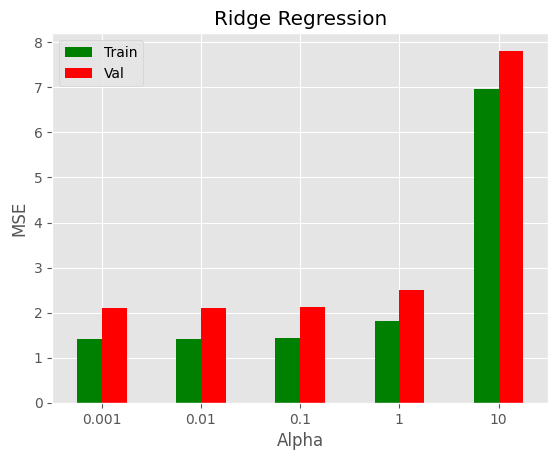

In [30]:
train_color,val_color = 'green','red'
ridge_df = pd.DataFrame(ridge_alpha_dict).T
ridge_df.columns = ['Train','Val']
ridge_df.plot.bar(rot=0, color={"Train": train_color, "Val": val_color},title='Ridge Regression',xlabel='Alpha',ylabel='MSE')

In [48]:
test_pred = Ridge(alpha=0.001).fit(X_train,y_train).predict(X_test)

print("The test set error is ", mean_squared_error(y_test,test_pred))

The test set error is  2.471507540914568


## ELASTIC REGRESSION GRID SEARCH

In [50]:
from sklearn.model_selection import GridSearchCV
import numpy as np
params_grid = {
    "alpha": alpha_list,
    "l1_ratio": np.arange(0.0, 1.0, 0.1)
}

elastic_net = ElasticNet()
elasticnet_grid = GridSearchCV(elastic_net,param_grid=params_grid,n_jobs=-1,cv=4,return_train_score=True,scoring='neg_mean_squared_error')

elasticnet_grid.fit(X_train,y_train)

GridSearchCV(cv=4, estimator=ElasticNet(), n_jobs=-1,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10],
                         'l1_ratio': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])},
             return_train_score=True, scoring='neg_mean_squared_error')

In [51]:
elasticnet_grid.best_estimator_

ElasticNet(alpha=0.001, l1_ratio=0.9)

##### USING THE BEST HYPERPARAMETERS FOR FITTING AND TESTING

In [56]:
test_pred = ElasticNet(alpha=0.01,l1_ratio=0.9).fit(X_train,y_train).predict(X_test)

print("The test set error is ", mean_squared_error(y_test,test_pred))

The test set error is  5.72903739929426


## STOCHASTIC GRADIENT DESCENT

In [57]:
import numpy as np
m = len(X_train)
np.random.seed(42)

In [59]:
import math
from tqdm import tqdm

def get_batches(X:pd.DataFrame,y:pd.DataFrame,batch_size:int):
    num_train = X.shape[0]

    indices = np.arange(num_train)
    np.random.shuffle(indices)

    for start_idx in range(0,num_train,batch_size):
        #Ensures that we pick the required number of elements till the last element
        end_idx = min(start_idx+batch_size,num_train)
        batch_idx = indices[start_idx:end_idx]

        yield X.values[batch_idx],y.values[batch_idx]

def get_loss(X,y,weights_list:list):
    losses = []
    val_len = X.shape[0]
    for weight in weights_list:
        curr_weight_loss = 0.0
        for validation_data in zip(X.values,y.values):
            X_curr,y_curr = validation_data
            y_pred = X_curr@weight
            curr_weight_loss+=(y_pred[0]-y_curr)**2
        losses.append(curr_weight_loss/val_len)
    return losses

def learning_rate_scheduler(curr_iter:int,initial_lr:float):
    return initial_lr/math.exp(curr_iter)
    
def minibatch_sgd(X,y,batch_size:int=32,lr0:float=0.1,num_epochs:int=100):
    X_train_, X_val_, y_train_, y_val_ = train_test_split(X,y,test_size=0.1,random_state=42,shuffle=True)
    weight_path_sgd = []
    weight = np.random.randn(X_train.shape[1],1) 
    train_loss = []
    # scale = X_train_.shape[0]//batch_size
    for epoch in tqdm(range(num_epochs)):
        batch_iterator = get_batches(X_train_,y_train_,batch_size)
        curr_train_loss = 0.0
        for idx,batches in enumerate(batch_iterator):
            X_curr,y_curr = batches
            y_curr = np.expand_dims(y_curr,axis=1)
            grads = 2/batch_size * X_curr.T.dot(X_curr.dot(weight) - y_curr)
            # eta = learning_rate_scheduler(idx/scale,lr0)
            weight = weight - lr0*grads
        train_loss.append(get_loss(X_train_,y_train_,[weight])[0])
        weight_path_sgd.append(weight)
    val_loss = get_loss(X_val_,y_val_,weight_path_sgd)

    return weight_path_sgd,train_loss,val_loss


In [60]:
%%time
weight_path_sgd,train_loss,val_loss = minibatch_sgd(X_train,y_train,lr0=0.0001,num_epochs=50,batch_size=16)

100%|██████████| 50/50 [00:02<00:00, 23.56it/s]

CPU times: total: 1.88 s
Wall time: 2.14 s


In [ ]:
print('The test loss is: ')
get_loss(X_test,y_test,[weight_path_sgd[-1]])[0]

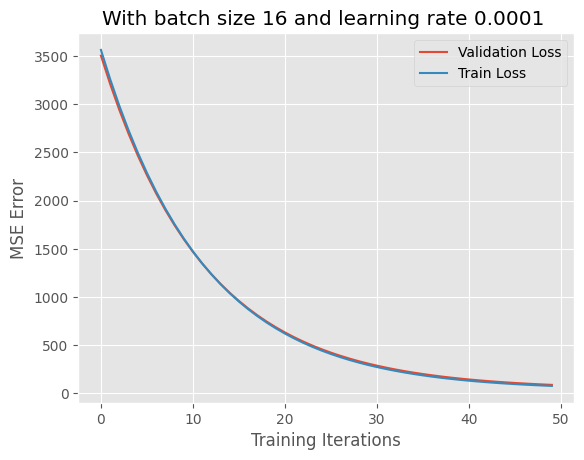

In [61]:
import matplotlib.pyplot as plt
plt.plot(val_loss,label='Validation Loss')
plt.plot(train_loss,label='Train Loss')
# plt.plot(test_loss,label='Test Loss')
plt.xlabel('Training Iterations')
plt.ylabel('MSE Error')
plt.title(f'With batch size {16} and learning rate {0.0001} ')
plt.legend()

In [62]:
%%time
weight_path_sgd,train_loss,val_loss = minibatch_sgd(X_train,y_train,lr0=0.0001,num_epochs=50,batch_size=1)

100%|██████████| 50/50 [00:32<00:00,  1.53it/s]

CPU times: total: 31.1 s
Wall time: 32.7 s


In [ ]:
print('The test loss is: ')
get_loss(X_test,y_test,[weight_path_sgd[-1]])[0]

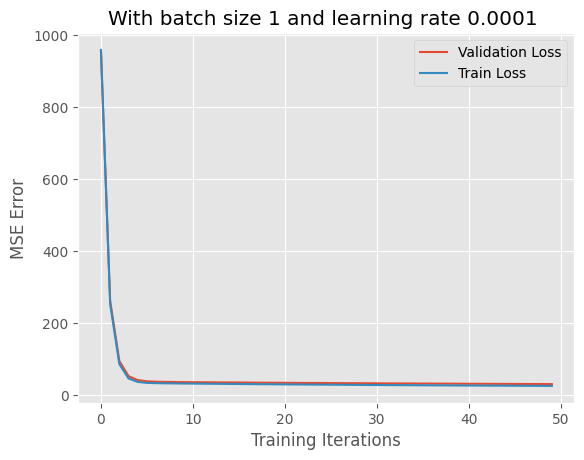

In [63]:
plt.plot(val_loss,label='Validation Loss')
plt.plot(train_loss,label='Train Loss')
# plt.plot(test_loss,label='Test Loss')
plt.xlabel('Training Iterations')
plt.ylabel('MSE Error')
plt.title(f'With batch size {1} and learning rate {0.0001} ')
plt.legend()

In [64]:
%%time
weight_path_sgd,train_loss,val_loss = minibatch_sgd(X_train,y_train,lr0=0.01,num_epochs=20,batch_size=1)

100%|██████████| 20/20 [00:12<00:00,  1.59it/s]

CPU times: total: 11.9 s
Wall time: 12.6 s


In [ ]:
print('The test loss is: ')
get_loss(X_test,y_test,[weight_path_sgd[-1]])[0]

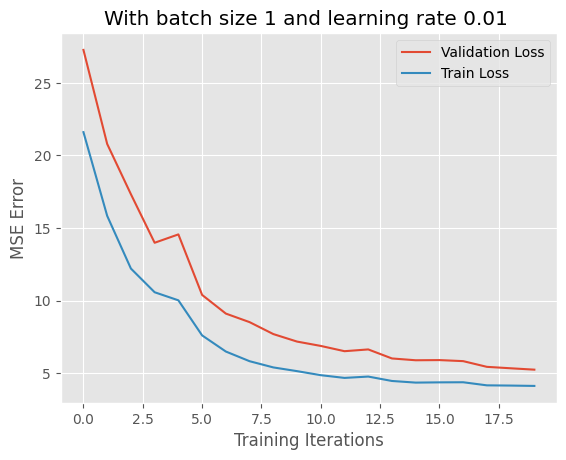

In [65]:
plt.plot(val_loss,label='Validation Loss')
plt.plot(train_loss,label='Train Loss')
# plt.plot(test_loss,label='Test Loss')
plt.xlabel('Training Iterations')
plt.ylabel('MSE Error')
plt.title(f'With batch size {1} and learning rate {0.01} ')
plt.legend()

In [66]:
%%time
weight_path_sgd,train_loss,val_loss = minibatch_sgd(X_train,y_train,lr0=0.01,num_epochs=50,batch_size=32)

100%|██████████| 50/50 [00:01<00:00, 39.84it/s]

CPU times: total: 1.12 s
Wall time: 1.28 s


In [69]:
print('The test loss is: ')
get_loss(X_test,y_test,[weight_path_sgd[-1]])[0]

The test loss is: 


17.864612117730214

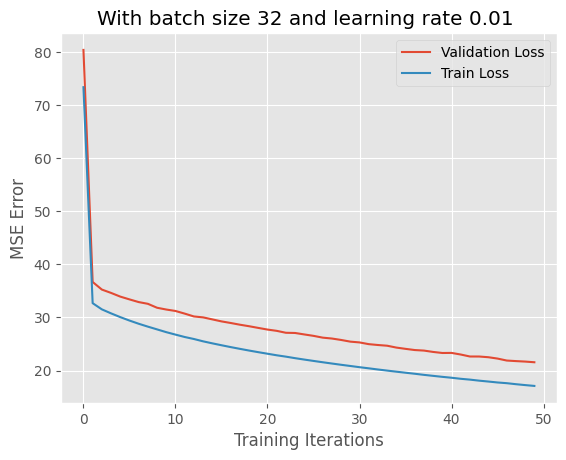

In [67]:
plt.plot(val_loss,label='Validation Loss')
plt.plot(train_loss,label='Train Loss')
# plt.plot(test_loss,label='Test Loss')
plt.xlabel('Training Iterations')
plt.ylabel('MSE Error')
plt.title(f'With batch size {32} and learning rate {0.01} ')
plt.legend()

#### OBSERVATIONS
* We can see that if the batch size is lower, then the training time increases. Like for a batch size of 1 (SGD), we got training time of around `12s`, but for larger batch sizes the training is lower
* For lower batch size, the learning curves are not smooth, rather they are also oscillating.
* For lower batch size, the learning curves for train and validation have some disparity, which suggests overfitting, which not substantial for higher batch sizes

## POLYNOMIAL REGRESSION

In [75]:
from sklearn.preprocessing import PolynomialFeatures

degree_list = [2,3,5,7,10]

In [82]:
from sklearn.metrics import mean_squared_error

lin_reg_poly = {}
lin_reg_poly_model = {}
#Take a subset of train data columns
X_sub_train = X_train[X_train.columns[:7]]
for deg in degree_list:
    poly_transform = PolynomialFeatures(degree=deg,interaction_only=True)
    cv_poly_reg = LinearRegression()
    X_poly = poly_transform.fit_transform(X_sub_train)
    cv_lin_reg_poly = cross_validate(cv_poly_reg,X_poly,y_train,cv=4,scoring='neg_mean_squared_error',return_train_score=True,n_jobs=-1)

    lin_reg_poly.update({f'{deg}':[-cv_lin_reg_poly['train_score'].mean(),-cv_lin_reg_poly['test_score'].mean()]})
    lin_reg_poly_model.update({f'{deg}':cv_poly_reg.fit(X_poly,y_train)})


In [83]:
train_color,val_color = 'green','red'
poly_df = pd.DataFrame(lin_reg_poly).T
poly_df.columns = ['Train','Val']
print(poly_df)

        Train        Val
2   12.563923  13.224818
3   11.465560  13.027999
5   10.772628  19.443327
7   10.408880  23.599491
10  10.408880  23.599491


<AxesSubplot:title={'center':'Polynomial Regression'}, xlabel='Degree', ylabel='MSE'>

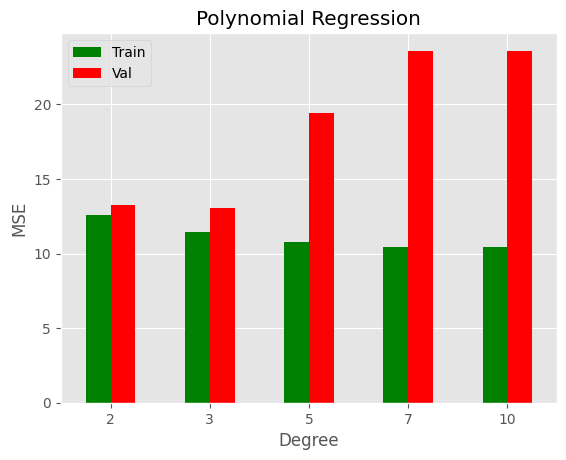

In [84]:
poly_df.plot.bar(rot=0, color={"Train": train_color, "Val": val_color},title='Polynomial Regression',xlabel='Degree',ylabel='MSE')

### OBSERVATIONS
* We can see that the disparity between the train and validation set increases with the degree of the polynomial. This signals overfitting, as we increase the number of features, the validation and train set error starts to diverge, and also the training time increases. 